In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_excel_sheets(path):
    # Open the excel file
    xl = pd.ExcelFile(path)
    # Create an empty list to store the dataframes
    dfs = []
    # Loop through each sheet in the excel file
    for sheet_name in xl.sheet_names:
        # Read the sheet into a dataframe
        df = pd.read_excel(xl, sheet_name)
        # Add a column with the sheet name
        # First parse the sheet name so it´s a date. It comes in the format: "short month day year"
        df['Date'] = pd.to_datetime(sheet_name, format='%b %d %Y')
        # Append the dataframe to the list
        dfs.append(df)
    # Concatenate all the dataframes into a single dataframe
    result = pd.concat(dfs, ignore_index=True)
    return result

,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,Issuer,Maturity,Maturity.1,Index Rating (String),BCLASS 2,Cpn,Payment rank,Date,Payment Rank,Unnamed: 0
0,US852061AK63,S 9 11/15/18,USD,124.500,4.209298,4.750172,3000000.0,3.783000e+06,0.325330,4.209298,SPRINT COMMUNICATIONS INC,5.822222,11/15/2018,BA3,INDUSTRIAL,9.000,Sr Unsecured,2013-01-18,NaN,NaN
1,US404121AC95,HCA 6 ½ 02/15/20,USD,113.750,4.229491,5.778464,3000000.0,3.495917e+06,0.300641,4.229491,HCA INC,7.072222,02/15/2020,BA2,INDUSTRIAL,6.500,1st lien,2013-01-18,NaN,NaN
2,US761735AN93,PTVE 5 ¾ 10/15/20,USD,103.750,4.988087,5.283333,3250000.0,3.429495e+06,0.294929,5.154282,REYNOLDS GRP ISS/REYNOLD,7.738889,10/15/2020,B1,INDUSTRIAL,5.750,1st lien,2013-01-18,NaN,NaN
3,US319963BB96,FDC 12 ⅝ 01/15/21,USD,107.250,11.105545,5.113684,2999994.0,3.411077e+06,0.293345,11.226144,FIRST DATA CORP,7.988889,01/15/2021,CAA1,INDUSTRIAL,12.625,Sr Unsecured,2013-01-18,NaN,NaN
4,US458204AH70,INTEL 11 ¼ 02/04/17,USD,106.125,4.812095,0.084089,2805000.0,3.111797e+06,0.267608,9.390606,INTELSAT LUXEMBOURG SA,4.041667,02/04/2017,CAA3,INDUSTRIAL,11.250,Sr Unsecured,2013-01-18,NaN,NaN


In [7]:
data = read_excel_sheets('LF98TRUU Index 2013.xlsx')
data = pd.concat([data, read_excel_sheets('LF98TRUU Index (2014-2023).xlsb')], ignore_index=True)

# merge two columns, Payment Rank and Payment rank into the same column named Payment Rank. Then remove Payment rank
data['Payment Rank'] = data['Payment Rank'].fillna(data['Payment rank'])
data = data.drop(columns=['Payment rank'])
# now merge the columns ISIN and Unnamed: 0 into the same column named ISIN. Then remove Unnamed: 0
data['ISIN'] = data['ISIN'].fillna(data['Unnamed: 0'])
data = data.drop(columns=['Unnamed: 0'])

data = data.rename(columns={'Maturity.1': 'Maturity Date'})

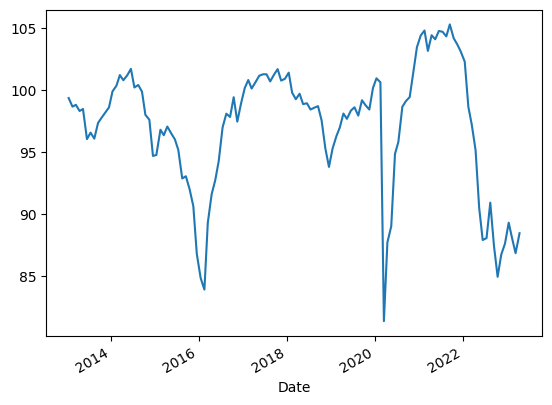

In [25]:
# now create a plot of the date and average price for each date. Also add a line for the average price for all dates and all price values
data.groupby('Date')['Price'].mean().plot()
plt.show()

# now create a new df with the average price for each date
data_avg = data.groupby('Date')['Price'].mean().reset_index()


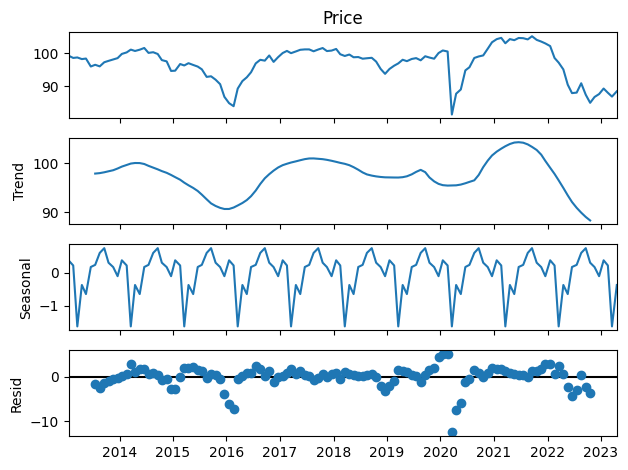

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# set data_avg index to Date
data_avg = data_avg.set_index('Date')

result = seasonal_decompose(data_avg['Price'], model='additive', period=12)

# now plot the result
result.plot()
plt.show()